<a href="https://colab.research.google.com/github/KASHYAPCHETAN438/Core-Python/blob/main/Pillar_of_Opps_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Encapsulatioin**

- It is the process of binding together variales and methods in a class.
- so that we can access them together by using a single unit (class).
- That is known as Encapsulation

**It helps in :-**
- To secure data
- To hide data
- Restrcit direct access from outside the class.
- Allow modifications only through controlled method

- It hides internal details of the class from outside access.




**Access Specifiers in Python**

- Access Specifiers control visibility of class members (attributes/methods).

- They decide where an attribute or method can be accessed from: inside the class, subclass, or outside the class.


| Type          | Syntax  | Accessibility / Description                                     |
| ------------- | ------- | --------------------------------------------------------------- |
| **Public**    | `var`   | Accessible **everywhere** (inside class, subclass, outside)     |
| **Protected** | `_var`  | Accessible **inside class & subclass**, not recommended outside |
| **Private**   | `__var` | Accessible **only inside the class** (name mangling hides it)   |


In [ ]:
class Person:
    def __init__(self, name, age, salary):
        self.name = name        # public attribute
        self._salary = salary   # protected attribute
        self.__age = age        # private attribute

    # Getter for private attribute
    def get_age(self):
        return self.__age

    # Setter for private attribute
    def set_age(self, age):
        if age > 0:
            self.__age = age
        else:
            print("Invalid age")

    # Getter for protected attribute (optional)
    def get_salary(self):
        return self._salary

    # Setter for protected attribute (optional)
    def set_salary(self, salary):
        if salary >= 0:
            self._salary = salary
        else:
            print("Invalid salary")


# Create object
p = Person("Mohit", 25, 50000)

# Access public attribute
print(p.name)           # Mohit

# Access protected attribute (possible but by convention should be cautious)
print(p._salary)        # 50000

# Access private attribute via getter
print(p.get_age())      # 25

# Update private attribute via setter
p.set_age(30)
print(p.get_age())      # 30

# Update protected attribute via setter
p.set_salary(60000)
print(p.get_salary())   # 60000


Mohit
50000
25
30
60000


# --------** ABSTRACTION (DATA HINDING) **--------


**Data Hiding:**

* Data hiding refers to restricting access to certain variables or methods so that they are not directly accessed from outside the class.

**Public:**

* Attributes or methods that can be accessed directly from outside the class.
* Private: Attributes or methods that are meant to be hidden and can only be accessed within the class.

G**etters and Setters:**

* Methods used to get or set the value of private attributes.

**How to Hide Data in Python:**

* **Private Variables:**

    * By convention, you prefix the variable with __ to make it private.

* **Public Methods:**

    * You can provide public methods (getters/setters) to access and modify private variables.


In [ ]:
class Employee:
    def __init__(self, name, salary):
        self.name = name          # Public attribute
        self.__salary = salary    # Private attribute (data hiding)

    # Getter for private attribute
    def get_salary(self):
        return self.__salary

    # Setter for private attribute
    def set_salary(self, salary):
        if salary > 0:
            self.__salary = salary
        else:
            print("Invalid salary. Must be positive.")

# Create object
emp = Employee("Mohit", 50000)

# Access public attribute directly
print(emp.name)        # Mohit

# Try to access private attribute directly (will cause error)
# print(emp.__salary)  # ❌ AttributeError

# Access private attribute via getter
print(emp.get_salary())  # 50000

# Update private attribute via setter
emp.set_salary(60000)
print(emp.get_salary())  # 60000

# Try setting invalid salary
emp.set_salary(-1000)    # Invalid salary. Must be positive.


Mohit
50000
60000
Invalid salary. Must be positive.


In [18]:
class Employee:
    def __init__(self, name, salary):
        self.name = name
        self.__salary = salary  # Private attribute

    @property
    def salary(self):
        return self.__salary

    @salary.setter
    def salary(self, value):
        if value > 0:
            self.__salary = value
        else:
            print("Invalid salary. Must be positive.")

# Create object
emp = Employee("Mohit", 50000)

# Access public attribute
print(emp.name)        # Mohit

# Access private attribute via property (abstraction)
print(emp.salary)      # 50000

# Update salary using setter
emp.salary = 60000
print(emp.salary)      # 60000

# Try setting invalid salary
emp.salary = -1000     # Invalid salary. Must be positive.






# __salary is hidden (data hiding).
# salary property gives controlled access (abstraction).

Mohit
50000
60000
Invalid salary. Must be positive.


# **Polymorphism in Python  (Not directly ❌)**

- Polymorphism means “many forms”.

- It allows objects of different classes to be treated in a similar way.

- Same method name or operator behaves differently based on object or context.


# Types of Polymorphism in Python

**Compile-time / Method Overloading**

- Python does not support traditional method overloading like Java/C++.

- Can simulate using default arguments or *args.

**Runtime / Method Overriding**

- Subclass provides its own version of a method from the parent class.

- Example of inheritance + polymorphism.

**Operator Overloading**

- Same operator behaves differently for different data types.

- Example:
      
    + adds numbers, concatenates strings.

**Duck Typing**

Python focuses on behavior, not type.

If an object acts like the expected type, it works.

----

**Python Method Overloading**



- Method overloading is the ability to have multiple methods with the same name but different parameters.

- In languages like Java or C++, this is directly supported.

* **Python Support:**

- Python does not support method overloading directly.

- If you define multiple methods with the same name, the last method definition overrides the previous ones.

* **Reason:**

- Python is dynamically typed , follow duck typing philosophy
- Does'nt have primitive data type
- Name of variables are just reference here



1. **Default Arguments**

In [ ]:
class Demo:
    def add(self, a, b, c=0):
        return a + b + c

d = Demo()
print(d.add(1, 2))    # 3
print(d.add(1, 2, 3)) # 6


2. ***args / kwargs**

In [ ]:
class Demo:
    def add(self, *args):
        return sum(args)

d = Demo()
print(d.add(1, 2))       # 3
print(d.add(1, 2, 3, 4)) # 10


3. **Type-based Overloading (singledispatch)**

- Only the first argument’s type is considered for dispatch.

- Default function is mandatory → acts as a fallback.

- Use @<function>.register(<type>) to register type-specific versions.

- Works for any Python type: int, str, list, dict, etc.

- Available in Python 3.4+.

- Helps write clean polymorphic code without type checks





In [ ]:
from functools import singledispatch

@singledispatch
def process(arg):
    print("Default:", arg)

@process.register(int)
def _(arg):
    print("Integer:", arg)

@process.register(str)
def _(arg):
    print("String:", arg)

process(10)    # Integer: 10
process("Hi")  # String: Hi
process(3.5)   # Default: 3.5


In [ ]:
from functools import singledispatch

# Step 1: Base function (default)
@singledispatch
def show(x):
    print("Default of x:", x)

# Step 2: Register int type
@show.register(int)
def _(x):
    print("Integer value of x:", x)

# Step 3: Register list type
@show.register(list)
def _(x):
    print("List of values:", x)

# Test calls
show("hi")                # Default of x: hi
show(100)                 # Integer value of x: 100
show([334, 35, 22, 76])   # List of values: [334, 35, 22, 76]


Default of x: hi
Integer value of x: 100
List of values: [334, 35, 22, 76]


4. **use typing.overload**
-  overload option lets you declare multiple type signatures for linters/IDE type-checkers. it can be used to apply the concept of methods overloading like java /c/c++.

- from typing import overload

class Adder:

	@overload
	def add(self, a:int, b:int) ->
	def add(self, a:str, b:str) ->

	def add(self, a,b)
		return a+b



In [ ]:
from typing import overload

class Adder:
    # Overload signatures for type checkers
    @overload
    def add(self, a: int, b: int) -> int: ...

    @overload
    def add(self, a: str, b: str) -> str: ...

    # Actual implementation
    def add(self, a, b):
        return a + b

# Testing
adder = Adder()
print(adder.add(10, 20))      # 30
print(adder.add("Hi ", "Mohit"))  # Hi Mohit


30
Hi Mohit


Other example

In [ ]:
class parent:
    def display(self):
        c = 10
        print("Parent class ")
        print(c)

class child(parent):
    def display(self):
        super().display()
        b = 6
        print("child class")
        print(b)

class another_parent:
    def display(self):
        print("Another Parent Class")

class subchild(child, another_parent):
    def display(self):
        super().display()  # call child class display, then parent class display
        print("\nHybrid Inheritance with Polymorphism")

p1 = subchild()
p1.display()

Parent class 
10
child class
6

Hybrid Inheritance with Polymorphism


# **Method Overriding**

In [ ]:
class Animal:
    def speak(self):
        print("Animal makes a sound")

class Dog(Animal):
    def speak(self):
        print("Dog barks")

a = Animal()
d = Dog()

a.speak()  # Animal makes a sound
d.speak()  # Dog barks


# **Operator Overloading**

In [ ]:
print(5 + 10)       # 15 (int addition)
print("Hi " + "Mohit") # Hi Mohit (string concatenation)


15
Hi Mohit


# **Inheritance**

- Inheritance allows a class (child/derived class) to reuse the properties and methods of another class (parent/base class).

- This helps in code reusability and creating a hierarchy of classes.

-----

# **Single inheritance**

- One child inherits from one parent.

In [ ]:

class Parent:
    def pcfun(self):
        print("it is method of parent class")


class child(Parent):
    def scfun(self):
      print("it is method of child class class")

p1=child()
p1.pcfun()
p1.scfun()





In [ ]:
class brand:
    def __init__(self, fname, lname):
        self.name_1 = fname
        self.name_2 = lname

    def pdisplay(self):
        print("parent class method")
        print(self.name_1, self.name_2)


class model(brand):
    def __init__(self, fname, lname):
        super().__init__(fname, lname)
        print("\n child class method calling")
        print(self.name_1, self.name_2)

p1 = model("Raja", "Saryesh")
p1.pdisplay()



 child class method calling
Raja Saryesh
parent class method
Raja Saryesh


# **Multiple inheritance**

- A child inherits from more than one parent.
- This creates ambiguity about which method should be executed.

 **How Python Resolves This?**
 - Python handles such situations using the MRO (Method Resolution Order).

- MRO defines the order in which Python will search for a method or attribute in a hierarchy.

- It is based on the C3 Linearization algorithm.

- You can view it using:
       
    - ClassName.mro()
    - ClassName.__mro__

- MRO ensures a consistent order of method resolution even in complex multiple inheritance scenarios (like the Diamond Problem).




In [ ]:
class parent1:
    def add(self):
        c = 10
        print("Parent class 1")
        print(c)

class parent2:
    def display_color(self):
        b = 6
        print("Parent class 2")
        print(b)

class subchild(parent1, parent2):                   # Inherit from parent1 and parent2
    def display_all_info(self):
        self.add()                                  # Call the add method from parent1
        self.display_color()                        # Call the display_color method from parent2

                                                    # Create an instance of ColoredShape
p1=subchild()
p1.display_all_info()


Parent class 1
10
Parent class 2
6


In [13]:
class A:
    def show(self):
        print("Class A method")

class B:
    def show(self):
        print("Class B method")

class C(A, B):   # Multiple Inheritance
    pass

obj = C()
obj.show()              # Which one gets called?
print(C.mro())          # Check resolution order


Class A method
[<class '__main__.C'>, <class '__main__.A'>, <class '__main__.B'>, <class 'object'>]


# How this class call method show

1. Class strucutre
   - class C(A, B, D):
   - C inherits from A, B, D → Multiple inheritance.
   - Method Resolution Order (MRO) decides which show() is called in what order

2. Python calculates MRO

   - Python uses C3 linearization for multiple inheritance.

   - It creates a linear order of classes to look for methods.

          print(C.mro())
          [<class '__main__.C'>, <class '__main__.A'>, <class '__main__.B'>, <class '__main__.D'>, <class 'object'>]


3. Execution flow

   - C.__init__() runs → prints MRO (C, A, B, D).

   - self.show() → calls C.show() → prints: Class C function


   - super().show() inside C.show() → goes next in MRO → A.show() → prints: Class A function
  
   - super().show() inside A.show() → next in MRO → B.show() → prints: Class B function
   
   - super().show() inside B.show() → next in MRO → D.show() → prints: Class D method

- **Internal mechanism**

    - Each super() does not just call parent.

    - It calls the next class in the MRO relative to the current class.

    - So, in C(A, B, D):



       C.show() → super() → A.show()
      
       A.show() → super() → B.show()

       B.show() → super() → D.show()

       D.show() → super() → object.show() → AttributeError


In [14]:

# How this class call

class A:
    def show(self):
        print("Class A method")
        super().show()                      # Call mro and follow liner order (so call B)

class B:
    def show(self):
        print("Class B method")
        super().show()                      # Call mro and follow liner order (so call D)




class D:
  def show(self):
    print("Class D method ")               # if we super().show() what happen ?
                                           # Call mro and follow liner order so call Object class but object class
                                           # we are we not acess and object class doesn't have show() method


class C(A, B, D):
    def __init__(self):
        print("Classes in MRO :")
        for cls in C.mro()[0:-1]:           # resticate object class here
            print(cls.__name__)

                                                   # Call show() starting from this instance
        self.show()

    def show(self):
        print("Class C method")
        try:
            super().show()                        # Call class A
        except AttributeError:
            pass

# Create instance
obj = C()


print(C.mro())


Classes in MRO :
C
A
B
D
Class C method
Class A method
Class B method
Class D method 
[<class '__main__.C'>, <class '__main__.A'>, <class '__main__.B'>, <class '__main__.D'>, <class 'object'>]


In [12]:
class A:
    def show(self):
        print("show method inside the A class")

class B:
    def show(self):
        print("show method inside the B class")

class C(B,A):
    def show(self):
        print("show method inside the C class")
    def sayHello(self):
        print("hello method in c class")

classname = input("Enter classname : ")
ob = C()

for cls in C.mro()[0:-1]:
    print(cls)
    if classname == cls.__name__:
        if "show" in cls.__dict__:
            cls.show(ob)


# ob.show()
print("Output of MRO function :\n", C.mro())

Enter classname : B
<class '__main__.C'>
<class '__main__.B'>
show method inside the B class
<class '__main__.A'>
Output of MRO function :
 [<class '__main__.C'>, <class '__main__.B'>, <class '__main__.A'>, <class 'object'>]


# **Multilevel inheritance**

- A chain of inheritance.





In [ ]:
class parent:
    def display(self):
        c = 10
        print("Parent class ")
        print(c)
class child(parent):
    def display(self):
        super().display()
        b = 6
        print("child class")
        print(b)
class subchild(child):
    def display(self):
        super().display()
        print("sub child class \nMultilevel inheritance")
p1 = subchild()
p1.display()

In [6]:
class A:
  def show(self):
    print("Class A Method")

class B(A):
  def show(self):
    super().show()
    print("Class B Method ")

class C(B):
  def show(self):
    super().show()
    print("Class C method ")

obj=C()
obj.show()

Class A Method
Class B Method 
Class C method 


In [7]:
class Employee:
    def __init__(self, name, empid):  # corrected __init__
        self.name = name
        self.empid = empid

    def show_details(self):
        print(f"Employee Name : {self.name} \t Employee Id : {self.empid}")


class Manager(Employee):
    def __init__(self, name, empid, department):  # corrected __init__
        super().__init__(name, empid)
        self.department = department

    def show_managerdetails(self):
        self.show_details()
        print(f"Department : {self.department}")


class TeamLead(Manager):
    def __init__(self, name, empid, department, team_size):  # corrected __init__
        super().__init__(name, empid, department)
        self.team_size = team_size

    def show_teamlead_details(self):
        self.show_managerdetails()
        print(f"Team Size : {self.team_size}")


# Create instance
lead = TeamLead("Karan", 101, "Accounts", 8)
lead.show_teamlead_details()


Employee Name : Karan 	 Employee Id : 101
Department : Accounts
Team Size : 8


# **HIERARCHICAL INHERITANCE**

- Multiple children inherit from the same parent.

In [ ]:
class parent:
    def display(self):
        c = 10
        print("Parent class ")
        print(c)
class child(parent):
    def display(self):
        super().display()
        b = 6
        print("child class")
        print(b)
class subchild(child):
    def display(self):
        super().display()
        print("\nHierarchical inhertance")
p1 = subchild()
p1.display()

Parent class 
10
child class
6

Hierarchical inhertance


In [10]:
class BankAccount:
    def __init__(self, accountno, balance):   # ✅ fixed
        self.accountno = accountno
        self.balance = balance

    def deposit(self, amount):
        if amount <= 0:
            print("Please provide Valid Amount!!")
        else:
            self.balance += amount
            print("Amount deposited Successfully!!")

    def show_balance(self):
        print(f"Account : {self.accountno} has Rs. {self.balance} only/-")


class SavingAccount(BankAccount):
    def __init__(self, accountno, balance, interestrate):  # ✅ fixed
        super().__init__(accountno, balance)
        self.interestrate = interestrate

    def add_interest(self):
        interest = self.balance * self.interestrate / 100
        self.balance += interest
        print(f"Interest Added of Rs. {interest}. New balance is Rs. {self.balance}")


class CurrentAccount(BankAccount):
    def __init__(self, accountno, balance, overdraft_limit):  # ✅ fixed
        super().__init__(accountno, balance)
        self.odlimit = overdraft_limit

    def withdraw(self, amount):
        if self.balance + self.odlimit < amount:
            print("Insufficient Funds to Withdraw!!")
        else:
            self.balance -= amount
            print(f"Amount of Rs. {amount} withdrawn successfully!!")


# --- Testing ---
savingac = SavingAccount("XX2334344", 780000, 8)
current = CurrentAccount("xx393992", 102300, 10000)

savingac.deposit(88000)
savingac.show_balance()

current.withdraw(34500)
current.show_balance()


Amount deposited Successfully!!
Account : XX2334344 has Rs. 868000 only/-
Amount of Rs. 34500 withdrawn successfully!!
Account : xx393992 has Rs. 67800 only/-


# **HYBRID INHERITANCE**

- A combination of multiple types (complex).
- Python supports it but manages with MRO.
- May be Occur dimond error
- slove by MRO

In [ ]:
class parent:
    def display(self):
        c = 10
        print("Parent class ")
        print(c)

class child(parent):
    def display(self):
        super().display()
        b = 6
        print("child class")
        print(b)

class another_parent:  # New class for hybrid inheritance
    def show(self):
        print("Another Parent Class")

class subchild(child, another_parent):  # Inherits from child and another_parent
    def display(self):
        super().display()
        print("\nHybrid Inheritance")
        self.show() # calling the show method from another parent class
p1 = subchild()
p1.display()

In [ ]:
class Person:
    def __init__(self, name, age):
        self.__name = name
        self.__age = age
    def get_name(self):
        return self.__name

    def set_name(self, name):
        self.__name = name

    def get_age(self):
        return self.__age

    def set_age(self, age):
        if age > 0:
            self.__age = age
        else:
            print("Age should be positive!")

person1 = Person("Raj", 25)

print("Name:", person1.get_name())
print("Age:", person1.get_age())

person1.set_name("Ravi")
person1.set_age(30)

print("Updated Name:", person1.get_name())
print("Updated Age:", person1.get_age())



In [17]:
class Person:
    def __init__(self, name):
        self.name = name

    def display(self):
        print(f"Name: {self.name}")

class Student(Person):
    def __init__(self, name, roll_no):
        Person.__init__(self, name)
        self.roll_no = roll_no

    def display_student(self):
        print(f"Student Roll No: {self.roll_no}")

class Teacher(Person):
    def __init__(self, name, subject):
        Person.__init__(self, name)
        self.subject = subject

    def display_teacher(self):
        print(f"Teaches: {self.subject}")

class TeachingAssistant(Student, Teacher):
    def __init__(self, name, roll_no, subject):
        Student.__init__(self, name, roll_no)
        Teacher.__init__(self, name, subject)

    def display_ta(self):
        print(f"{self.name} is a TA for {self.subject} with Roll No {self.roll_no}")


ta = TeachingAssistant("Chetan", 101, "Python")
ta.display()
ta.display_student()
ta.display_teacher()
ta.display_ta()


Name: Chetan
Student Roll No: 101
Teaches: Python
Chetan is a TA for Python with Roll No 101


# How to Restricting Inheritance in Python ?

- **Make a Class Final (No Inheritance Allowed)**

In [ ]:
from typing import final

@final
class Parent:
    def show(self):
        print("This is Parent class")

class Child(Parent):                          # Error: Cannot inherit from final class
    show()
    print("Parent class  not inherit")
    pass


NameError: name 'show' is not defined

- **Make a Method Final (No Overriding Allowed)

In [3]:
from typing import final

class Parent:
    x=10
    @final
    def display(self):
        print("This is a final method, cannot be overridden")

class Child(Parent):
    def show_x(self):
       print(super().x)

    def display(self):                     #  Error: Cannot override final method
        print("Trying to override")

p1=Child()
p1.show_x()
p1.display()


10
Trying to override


# Interllay we can get this using __new__() method




#  Metaclass:-
- this is a class of a class. just like objects are created from the classes, in the same way, every class in python, gets created from the metaclass.
- By default, python uses type as the metaclass.

-  if you want to control how classes are created, then you can define a custom metaclass(by subclassing type).
# Namespace:
- it is a dictionary that holds the variable names and their values.
- When defining a class, the class body is executed, and all the methods/ attributes are collected into this dictionary.

  Example

- var = classname._dict_
# bases :  

- it is a tuple containing the parent classes from which the new class inherits.
- Whenever python creates a class,
- it known which parent to use via - this bases tuple.
- to get bases :

- Classname._bases_ : will print the direct parent

- to get the list of all the parent classes in a hierarchy:-  mro()


#  **getAttr():**

- this function returns the list  of variables, methods in a class.

- It is a built in function used to access an  attribute of an object dynamically.
syntax:
- **getAttr(object, name, default)**
- object :
      
    - the object whose attribute you want to check/ access.
- name :
    
     - it is the name of the attribute
- default(optional) :  
    
  - it returns a value if the attribute doesn't exist(otherwise raise AttributeError)


In [ ]:
class FinalMeta(type):
    def __new__(cls, name, bases, namespace):
        print("name : ", name)
        print("bases : ", bases)
        print("namespace : ", namespace)

        for base in bases:
            if getattr(base, "_is_final_", False):
                raise TypeError(f"Cannot Inherit from final class {base.__name__}")

        return super().__new__(cls, name, bases, namespace)


class Demo:
    def __init__(self, a, b):   # ✅ fixed
        self.a = a
        self.b = b

    def addValues(self):
        print(f"Sum of {self.a} and {self.b} is {self.a + self.b}")


class Child1(Demo, metaclass=FinalMeta):
    _is_final_ = True     # mark as final

    def findProduct(self):
        print(f"Product of {self.a} and {self.b} is {self.a * self.b}")


class Child2(Child1):   # Error
    def show(self):
        print(f"value of a : {self.a} and value of b : {self.b}")


# Object banake test karte hain
ob1 = Child1(10, 20)
ob1.addValues()
ob1.findProduct()

ob2 = Child2(12, 44)   # ❌ Error: Cannot inherit from final class
ob2.show()
ob2.addValues()


In [ ]:
# Namespace
class abc:
  pass

print(abc.__dict__)

{'__module__': '__main__', '__dict__': <attribute '__dict__' of 'abc' objects>, '__weakref__': <attribute '__weakref__' of 'abc' objects>, '__doc__': None}


In [ ]:
# Bases
class abc:
  pass


class bcd(abc):
  pass

class xyz(bcd):
  print("Xyz")


print(xyz.__bases__)


# to get all parent in hierarchy

print(xyz.__mro__)

Xyz
(<class '__main__.bcd'>,)
(<class '__main__.xyz'>, <class '__main__.bcd'>, <class '__main__.abc'>, <class 'object'>)


# Other Questions

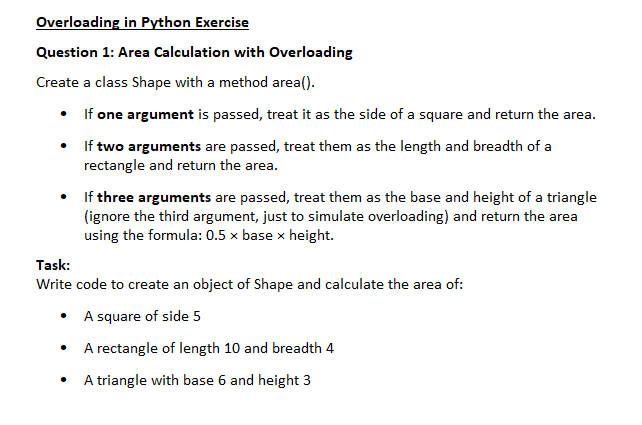

In [ ]:
class Shape:
    def area(self, *args):
        if len(args) == 1:
            print(f"Area of square: {args[0] * args[0]}")
        elif len(args) == 2:
            print(f"Area of rectangle: {args[0] * args[1]}")
        elif len(args) == 3:
            print(f"Area of triangle: {0.5 * args[0] * args[1]}")
        else:
            print("Invalid number of arguments")


ob = Shape()
ob.area(5)
ob.area(5, 6)
ob.area(5, 6, 7)


Area of square: 25
Area of rectangle: 30
Area of triangle: 15.0


In [ ]:
from functools import singledispatch

@singledispatch
def show(x):
    print("Invalid input")


@show.register(int)
def _(x):
    print(f"Area of square: {x * x}")


@show.register(tuple)
def _(x):
    if len(x) == 2:
        print(f"Area of rectangle: {x[0] * x[1]}")
    else:
        print("Invalid tuple for rectangle")

@show.register(list)
def _(x):
    if len(x) == 3:
        print(f"Area of triangle: {0.5 * x[0] * x[1]}")
    else:
        print("Invalid list for triangle")


show(5)
show((5,6))
show([7,8,9])

Area of square: 25
Area of rectangle: 30
Area of triangle: 28.0


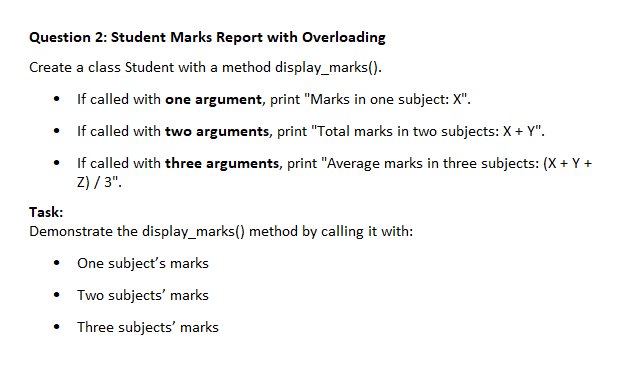

In [ ]:
class student:
    def dispaly_marks(self, *args):
        if len(args) == 1:
            print(f"One subject marks : {args[0]}")
        elif len(args) == 2:
            print(f"two subject marks : {args[0] + args[1]}")
        elif len(args) == 3:
            print(f"Average marks of three subject : {(0.5 + args[0] + args[1])/3}")
        else:
            print("Invalid number of arguments")


ob = student()
ob.dispaly_marks(95)
ob.dispaly_marks(95,78)
ob.dispaly_marks(95,92,93)


One subject marks : 95
two subject marks : 173
Average marks of three subject : 62.5
